In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM




train_path=r'./Train/'
test_path=r'./Test/'
#Predict_path=r'C:/Users/adm_ael-filou/Desktop/Exemple1/Prediction'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['Compound Switch','Oblique Crossing','Single Switch'],batch_size=16, shuffle=True)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['Compound Switch','Oblique Crossing','Single Switch'],batch_size=16, shuffle=True)
#Predict_batches = ImageDataGenerator().flow_from_directory(Predict_path, target_size=(256,256), classes=['Compound Switch','Oblique Crossing','Single Switch'],batch_size=16, shuffle=True)

model = Sequential()

inputs = input_shape= (256,256, 3)

model.add(Conv2D(16, kernel_size = (3, 3), activation='relu', input_shape= (256,256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())




model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())



model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(tf.keras.layers.BatchNormalization())

#model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(1,1)))
#model.add(BatchNormalization())

#model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(1,1)))
#model.add(BatchNormalization())

model.add(Dense(64, activation = 'relu'))


model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))
#model.add(Dense(32))
 

model.summary()


opt = Adam(learning_rate=0.001)



Using TensorFlow backend.


Found 12710 images belonging to 3 classes.
Found 2688 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_____________________________________

In [4]:
# (4) Compile 
#model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(train_batches, steps_per_epoch=794,
                   validation_data=test_batches, validation_steps=168,epochs=60,verbose=1)


Epoch 1/60
794/794 [==============================] - 247s 310ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1828 - val_accuracy: 0.9758
Epoch 2/60
794/794 [==============================] - 245s 309ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.1431 - val_accuracy: 0.9736
Epoch 3/60
794/794 [==============================] - 247s 311ms/step - loss: 0.0165 - accuracy: 0.9960 - val_loss: 0.1357 - val_accuracy: 0.9732
Epoch 4/60
794/794 [==============================] - 247s 311ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.1228 - val_accuracy: 0.9769
Epoch 5/60
794/794 [==============================] - 245s 309ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.1136 - val_accuracy: 0.9777
Epoch 6/60
794/794 [==============================] - 246s 310ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.1611 - val_accuracy: 0.9799
Epoch 7/60
794/794 [==============================] - 245s 308ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.2160 -

Epoch 57/60
794/794 [==============================] - 243s 306ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.1400 - val_accuracy: 0.9773
Epoch 58/60
794/794 [==============================] - 245s 309ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.2233 - val_accuracy: 0.9769
Epoch 59/60
794/794 [==============================] - 243s 305ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.2009 - val_accuracy: 0.9781
Epoch 60/60
794/794 [==============================] - 244s 307ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.1142 - val_accuracy: 0.9821


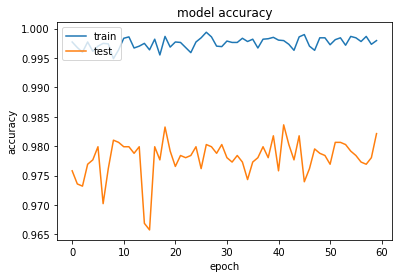

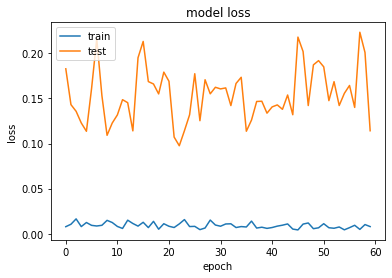

In [5]:
# summarize history for accurancy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [6]:
model.save('./Modelcpp1.h5')

In [7]:
results = model.evaluate(test_batches, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


Test Accuracy: 98.21%


In [ ]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.01, momentum=0.9)
#model.compile(..., optimizer=opt)

#steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
#validation_steps = TotalvalidationSamples / ValidationBatchSize

In [1]:
#Prediction for one image 
test_image = image.load_img(r'C:/Users/adm_ael-filou/Desktop/1.png',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

prediction=tensorflow.argmax(result)
#print (prediction)
probabilities=result
print (probabilities)
#type(result)
#print(np.amax(result))
max=np.amax(result)
#print(max)
index = np.where(result[0] == max)
#print(index)
#print(index[0])

train_batches.class_indices
if index[0]==[0]:
    prediction ='Compound Switch '

elif index[0]==[1]:
    prediction ='Oblique Crossing'  

else:
    prediction ='Single Switch'
print(prediction)

NameError: name 'image' is not defined

In [6]:
!pip install --user pyqt5



  Using cached PyQt5-5.15.4-cp36.cp37.cp38.cp39-none-win_amd64.whl (6.8 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.0.0 requires pyqtwebengine<5.13, which is not installed.
spyder 5.0.0 requires pyqt5<5.13, but you have pyqt5 5.15.4 which is incompatible.


You should consider upgrading via the 'c:\users\adm_ael-filou\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install --user pyqt5-tools

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\users\adm_ael-filou\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip' command.


In [8]:
import sys
print(sys.path)

['C:\\Users\\adm_ael-filou\\Desktop\\Finale2', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\python38.zip', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\DLLs', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\lib', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow', '', 'C:\\Users\\adm_ael-filou\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\lib\\site-packages', 'c:\\users\\adm_ael-filou\\desktop\\pfe\\bentley_ottmann', 'c:\\users\\adm_ael-filou\\desktop\\pfe\\bentley_ottmann\\bentley_ottmann', 'c:\\users\\adm_ael-filou\\desktop\\pfe\\bentley_ottmann\\bentley_ottmann\\isect_segments-bentley_ottmann', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\lib\\site-packages\\win32', 'C:\\Users\\adm_ael-filou\\Anaconda3\\envs\\Tensorflow\\lib\\site-packages\\win32\\lib', 'C:\\Users\\adm_ael-fil

In [2]:
!pip install pyqt5-tools


  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1


In [1]:
from platform import python_version

print(python_version())

3.8.10


In [3]:
import keras
